In [299]:
import nltk
from fuzzywuzzy import fuzz
import string
import random
import itertools
import pprint
import pyvis
from IPython.display import JSON
import numpy as np
import matplotlib.pyplot as plt

In [2]:
hamlet = nltk.corpus.gutenberg.sents('shakespeare-hamlet.txt')
def words_to_sent(w):
    s = w[0]
    s += ''.join([t if t in string.punctuation else ' '+t for t in w[1:]])
    return s
hamlet = list(map(words_to_sent, hamlet))
hamlet = list(filter(lambda l: len(l) >= 10, hamlet))

In [3]:
len(hamlet)

1912

In [4]:
pyvis.network.Network.add_node

<function pyvis.network.Network.add_node(self, n_id, label=None, shape='dot', **options)>

In [5]:
w = 800
def clip(x):
    return x[:20]

c = random.choices(hamlet, k=w*2)
a = c[:w]
b = c[w:]

a, b = map(clip, a), map(clip, b)
pairs = []
limit = 1000
for x, y in itertools.product(a, b):
    dist = fuzz.token_sort_ratio(x, y)
    if 60 < dist < 97:
        pairs.append([dist, x, y])
    if len(pairs) >= limit:
        break

pprinter = pprint.PrettyPrinter()
pprinter.pprint(pairs[:5])
print(len(pairs))

[[62, 'That thou so many Pr', 'How say you by that?'],
 [62, 'That thou so many Pr', 'How say you by that?'],
 [62, 'That thou so many Pr', 'How say you by that?'],
 [62, 'That thou so many Pr', 'Be thou as chast as '],
 [62, 'That thou so many Pr', "Thou prai' st not we"]]
1000


In [6]:
G.find(random.choice(G.nodes).value)

NameError: name 'G' is not defined

In [245]:
class Graph:
    def __init__(self, nodes=None, duplicate=False, u=False, **kwargs):
        if nodes is None:
            nodes = []
#         self.nodes = nodes
        self.nodes = []
        self.duplicate = duplicate
        if nodes:
            self.add_nodes(nodes, duplicate=u, **kwargs)
        

In [277]:
class Graph(Graph):
    def visualize(self, node_options={}, edge_options={}, **kwargs):
        self.visualization = pyvis.network.Network(notebook=True, **kwargs)
        added_nodes = []
        for node in self.nodes:
            text = node.value
            if not node.grouped:
#                 print(node.degree())
                

#                 deg = node.value

                if type(node.value) is str:
                    metric = len(node.value)
                else:
                    metric = node.value
                
#                 metric = node.degree()
                deg = f'hsl({metric*6}, 80%, 50%)'
                
                if not text:
                    text = ' '
                self.visualization.add_node(id(node), label=text, group=deg, **node_options)#, color=deg)#, size=deg**(1/4)*10)
#             for g in node.grouped:
#                 self.visualization.add_edge(text, g.value)
        for node in self.nodes:
#             print([list(map(str, n.grouped)) for n in self.nodes])
            defaults = {
                'smooth': True
            }
            edge_options = defaults | edge_options
            if len(node.grouped) == 2:
                if type(node.value) in [int, float]:
#                     d = int(10e2*1/(node.value*0.1))
                    
                    try:
                        self.visualization.add_edge(*[id(x) for x in node.grouped], label=node.value, **edge_options)
                    except:
                        pass
                else:
                    try:
                        self.visualization.add_edge(*[id(x) for x in node.grouped], label=node.value, **edge_options)
                    except:
                        pass
        return self.visualization.show('./visualization.html')

In [247]:
class Graph(Graph):
    def find(self, **kwargs):
        defaults = dict(unique=True)
        kwargs |= defaults
#         return list(filter(lambda n: n.value == x and n.unique, self.nodes))
        results = list(filter(lambda n: all((k in vars(n) and getattr(n, k) == v) for k, v in kwargs.items()), self.nodes))
        return Graph(nodes=results, duplicate=self.duplicate)

In [248]:
class Graph(Graph):
    def add_node(self, data, duplicate=False, return_node=True, metadata=None):
        new_node = None
#         if hasattr(self, 'duplicate'):
#         print(vars(self))
#         if duplicate is None:
#             duplicate = self.duplicate
        
        if type(data) in [list, tuple]:
            matches = self.find(value=data[0])
            if (not matches) or duplicate:# or data[0] in '+':
                connecting_node = Node(data[0], data[1:], graph=self, metadata=metadata, duplicate=duplicate)
    #             self.nodes.append(connecting_node)
#                 self.add_node(connecting_node)
                self.add_node(connecting_node, metadata=metadata, duplicate=duplicate)
                new_node = connecting_node
            elif matches:
                new_node = matches[0]
        elif type(data) in [Node]:
            matches = self.find(value=data.value)
#             print(matches, data.value)
            if (not matches) or duplicate:# or data.unique:
#             if not matches or type(data.value) is int:
                self.nodes.append(data)
                new_node = data
            elif matches:
                new_node = matches[0]
        elif type(data) in [str, int, float, bool]:
            matches = self.find(value=data)
            if (not matches) or (duplicate and str(data) == '   '):
#                 print(data, matches.nodes, Node(data).value)
                new_node = Node(data, graph=self, metadata=metadata, duplicate=duplicate)
            elif matches:
                new_node = matches[0]
        
        if return_node == 'inner':
            return new_node.grouped
        elif return_node:
            return new_node
        else:
            return self
    

In [249]:
class Graph(Graph):
    def sample(self, n=1):
        return Graph(nodes=random.sample(self.nodes, k=n))
    
    def sample_nodes(self, n=1):
        return random.sample(self.nodes, k=n)
    
    def add_nodes(self, x, **kwargs):
        for xi in x:
            self.add_node(xi, **kwargs)
        return self
    
    def join(self, x, q='s'):
        lx = len(x.nodes)
        for i in range(lx):
            val = x.nodes[i].value
            if 'e' not in val:
                self.nodes[i].extend(x.nodes[i].value+str(i)+q, f'e{val}{i}'+q, duplicate=True)
        return self
    

In [251]:
class Graph(Graph):
    def __getitem__(self, i):
        return self.nodes[i]
    
    def __bool__(self):
        return bool(self.nodes)
    
# semi-toroidal graphs

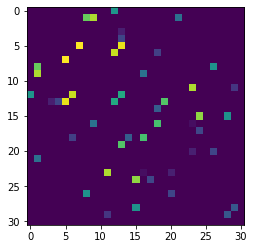

In [377]:
class Graph(Graph):
    def AdjacencyMatrix(self, use_weights=True, weight_prop='weight'):
        matrix = np.zeros([len(self.nodes)//2+2]*2)
        for a, b in itertools.product(self.nodes, repeat=2):
            if a in b.adjacent():
                connecting_node = list(filter(lambda x: all(y in x.grouped for y in [a, b]), self.nodes))[0]
                if use_weights and hasattr(connecting_node, weight_prop):
                    value = getattr(connecting_node, weight_prop)
                else:
                    value = 1
                matrix[self.nodes.index(a), self.nodes.index(b)] = value
        return matrix

R = RandomGraph(30, 30, weighted=True)
plt.imshow(R.AdjacencyMatrix())

In [376]:
class RandomGraph(Graph):
    def __init__(self, n, m, weighted=False, weight_bounds=[0, 1]):
        super().__init__()
        self.add_nodes(list(range(1,n+1)))
        metadata = [{}]
        for im in range(m):
            if weighted:
                metadata[0]['weight'] = random.uniform(*weight_bounds)
            self.add_node([n+im]+random.sample(self.nodes[:n], k=2), metadata=metadata)
        
R = RandomGraph(100, 100, weighted=True)
print(random.choice(R.nodes).weight)
# R.visualize(width=1000, height=1000, node_options={'shape': 'circle'})

0.592894285859977


In [ ]:
pyvis.network.Network

# dynamic graphs/temporal analysis
# add advanced graph indexing syntax

In [386]:
class Randomizer:
    def __init__(self, lower=0, upper=1, distribution='uniform', form='continuous'):
        self.lower = lower
        self.upper = upper
        self.distribution = distribution
        
    def sample(self):
        return getattr(random, self.distribution)(self.lower, self.upper)
    
    def __call__(self):
        return self.sample()

In [384]:
class CompleteGraph(Graph):
    def __init__(self, n, weighted=False, weights=1):
        super().__init__()
        self.add_nodes(list(range(1,n+1)))
        metadata = [{}]
        for i in range(n):
            for j in range(n):
                if i != j:
#                     print(i, j)
                    ni = self.nodes[i]
                    nj = self.nodes[j]
                    
                    if weighted:
                        if type(weights) in [int, float]:
                            metadata[0]['weight'] = weights
                        elif type(weights) in [Randomizer]:
                            metadata[0]['weight'] = weights.sample()
                    self.add_node([f'E{ni.value+nj.value}', ni, nj], duplicate=True, metadata=metadata)
        
R = CompleteGraph(7, weighted=True, weights=Randomizer())
R.visualize(width=1000, height=1000, node_options={'shape': 'circle'}, edge_options={'smooth': True})

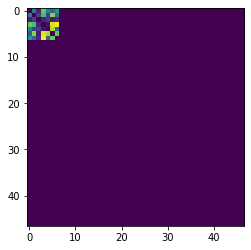

In [385]:
plt.imshow(R.AdjacencyMatrix())

In [239]:
class GridGraph(Graph):
    def __init__(self, dims):
        super().__init__([], False, False)
        last = Graph(['x'], True, True)
        for d in dims:
            L = Graph(['x'], True, True)
#             print(list(map(str,L.nodes)), list(map(str,last.nodes)))
            for n in range(d-1):
                L = L.join(last, str(n))
            last.nodes = [q for q in L.nodes]
        self.nodes = last.nodes

R = GridGraph([3, 4])
# R.visualize(width=1000, height=1000, node_options={'shape': 'circle'})

In [233]:
# list(map(str,R.nodes))
[list(map(str,x.grouped)) for x in R.nodes]

[[],
 [],
 ['x', 'x0'],
 ['x', 'x0'],
 [],
 ['x0', 'x01'],
 ['x0', 'x01'],
 ['x', 'x0'],
 ['x', 'x0'],
 ['x0', 'x01'],
 ['x0', 'x01'],
 ['x', 'x0'],
 ['x', 'x0'],
 ['x0', 'x01'],
 ['x0', 'x01'],
 ['x', 'x0'],
 ['x', 'x0'],
 ['x0', 'x01'],
 ['x0', 'x01'],
 ['x', 'x0'],
 ['x', 'x0'],
 ['x0', 'x01'],
 ['x0', 'x01'],
 ['x', 'x0'],
 ['x', 'x0'],
 ['x0', 'x01'],
 ['x0', 'x01'],
 ['x', 'x0'],
 ['x', 'x0'],
 ['x0', 'x01'],
 ['x0', 'x01']]

In [240]:
class Node:
    def init(self, value, grouped=None, graph=None, metadata=None, **kwargs):
        self.value = value
        if grouped is None:
            grouped = []
#         self.grouped = [g if type(g) is Node else Node(g, graph=graph) for g in grouped]
        self.graph = graph
        if metadata:
            M = metadata[1:]
        else:
            M = None
        self.grouped = [g if type(g) is Node else self.graph.add_node(g, metadata=M, **kwargs) for g in grouped]
        self.unique = True#not (type(self.value) is int)
#         print(self.graph, self.value)
#         if self.graph:
        if self.graph is not None:
            self.graph.add_node(self, duplicate=True)#, **kwargs)
        
        if metadata:
            for k, v in metadata[0].items():
                setattr(self, k, v)
            
    def degree(self):
        self.deg = None
        if self.graph:
#             self.deg = sum(int(self in x.grouped) for x in self.graph.nodes)
#             self.deg = sum(map(bool, self.graph.find(self.value)))
            self.deg = sum(self in x.grouped for x in self.graph.nodes)
#             print(self.deg)
        return self.deg
    
    def adjacent(self, exclude=None):
        grouping_nodes = [x for x in self.graph.nodes if (self in x.grouped)]
        return Graph(nodes=[n for gn in grouping_nodes for n in gn.grouped if (n is not self and (not exclude or n not in exclude.nodes))])
    
    def extend(self, z, w, return_new=False, return_node=False, **kwargs):
        n = self.graph.add_node([w, self, z], return_node=return_node, **kwargs)
        if return_new:
            return n
        else:
            return self
    
    def __str__(self):
        return str(self.value)

In [241]:
for cls in [Graph, Node]:
    if hasattr(cls, 'init'):
        setattr(cls, '__init__', getattr(cls, 'init'))
    

# G = Graph()
# G.add_nodes(pairs, metadata=[dict(cat='similarity'), dict(cat='text')]).nodes[0].value
# G.visualize(width=1000, height=1000)

In [244]:
symbols = '++--'
num = [dict(cat='num')]
op = [dict(unique=False), dict(unique=False)]
# G = Graph(nodes=[1, 1], duplicate=True, metadata=num)

L = 6
#     start_values = [2, 12, 4, 32, 7]
start_values = [random.randint(-10, 10) for i in range(6)]
G = Graph(start_values, False, False, metadata=num)
# G.evolve(lambda x: x.branch(lambda y: y+))
# print(G.nodes)
buffer = [v for v in G.nodes]
for i in range(30):
#         s = sorted(G.find(cat='num').nodes, key=lambda k: k.value, reverse=True)[:3]
    s = buffer[-L:]

#     print(s, G.nodes)
#         print([a.value for a in s])
#         j = G.add_node(sum(n.value for n in s), metadata=num)
    s = [v.value for v in s]
    j = G.add_node(((s[-1]+s[-3])-s[-4])-(abs(s[-5])+1), metadata=num, duplicate=True)
    buffer.append(j)
    buffer.pop(0)
#         G.add_node(['+', s[0], j], metadata=op, duplicate=False)
#         G.add_node(['+', s[1], j], metadata=op)
    for l in range(4):
#             G.add_node(Node('+', [s[l], j], graph=G), duplicate=False)
#             breakpoint()
        Node(symbols[l], [s[l], j], graph=G, duplicate=False)
#     *s?
G.visualize(width=1000, height=1000, directed=True, node_options={'shape': 'circle'})


# graph lambda
# rule class/strings?
# Graph(rule=)

In [326]:
S = 'know'
G = Graph([S], False, False)
# for t in range(2):
#     B = G.nodes[t]
f = 0
done = []
for B in G.nodes:
    v = B.value
    if ' ' not in v:
        for i in range(len(v)):
            R = v[:i]+v[i+1:]
            if len(R)>0:
                B.extend(R, '   ', metadata=num, duplicate=True)
                f += 1
    if f > 200:
        break

# options = {'font': {'background': 'white'}}
options = {}
G.visualize(node_options={'shape': 'circle'}, edge_options=options, width=1000, height=1000, directed=True)

In [267]:
G.nodes.__sizeof__()

72

In [280]:
len(G.nodes)

245

In [88]:
j

In [282]:
# list(map(str, G.nodes))

In [90]:
G.find(cat='num').nodes

In [91]:
# [c.cat for c in G.nodes]
for c in G.nodes:
#     if hasattr(c, 'cat'):
#         print(c.cat, c.value)
    print(c.value, list(map(str, c.grouped)), c.unique)

1 [] True
1 [] True
2 [] True
+ ['1', '2'] True
+ ['1', '2'] True
3 [] True
+ ['2', '3'] True
+ ['1', '3'] True
5 [] True
+ ['3', '5'] True
+ ['2', '5'] True
8 [] True
+ ['5', '8'] True
+ ['3', '8'] True
13 [] True
+ ['8', '13'] True
+ ['5', '13'] True
21 [] True
+ ['13', '21'] True
+ ['8', '21'] True
34 [] True
+ ['21', '34'] True
+ ['13', '34'] True
55 [] True
+ ['34', '55'] True
+ ['21', '55'] True
89 [] True
+ ['55', '89'] True
+ ['34', '89'] True
144 [] True
+ ['89', '144'] True
+ ['55', '144'] True


In [ ]:
G.duplicate

In [ ]:
# G.add_node([5], return_node=False).nodes
list(map(str,G.nodes))
# add callbacks

In [ ]:
r = G.find(cat='text').sample_nodes()[0]
visited = Graph()
for i in range(20):
    print(r.value)
    visited.add_node(r)
    neighbors = r.adjacent(exclude=visited).nodes
    if neighbors:
        r = neighbors[0]
    else:
        break

In [ ]:
r[0].cat

In [284]:
# G.nodes[35].grouped
# G.nodes
# sorted(list(map(str, [list(map(str, g.grouped)) for g in G.nodes])), reverse=True)
sorted(list(map(lambda x: (str(x.value)), G.nodes)))

['all',
 'allo',
 'allos',
 'allot',
 'allots',
 'alls',
 'allt',
 'allts',
 'alo',
 'alos',
 'alot',
 'alots',
 'als',
 'alt',
 'alts',
 'ao',
 'aos',
 'aot',
 'aots',
 'as',
 'at',
 'ats',
 'll',
 'llo',
 'llos',
 'llot',
 'llots',
 'lls',
 'llt',
 'llts',
 'lo',
 'los',
 'lot',
 'lots',
 'ls',
 'lt',
 'lts',
 'os',
 'ot',
 'ots',
 'ts',
 '~',
 '~',
 '~',
 '~',
 '~',
 '~',
 '~',
 '~',
 '~',
 '~',
 '~',
 '~',
 '~',
 '~',
 '~',
 '~',
 '~',
 '~',
 '~',
 '~',
 '~',
 '~',
 '~',
 '~',
 '~',
 '~',
 '~',
 '~',
 '~',
 '~',
 '~',
 '~',
 '~',
 '~',
 '~',
 '~',
 '~',
 '~',
 '~',
 '~',
 '~',
 '~',
 '~',
 '~',
 '~',
 '~',
 '~',
 '~',
 '~',
 '~',
 '~',
 '~',
 '~',
 '~',
 '~',
 '~',
 '~',
 '~',
 '~',
 '~',
 '~',
 '~',
 '~',
 '~',
 '~',
 '~',
 '~',
 '~',
 '~',
 '~',
 '~',
 '~',
 '~',
 '~',
 '~',
 '~',
 '~',
 '~',
 '~',
 '~',
 '~',
 '~',
 '~',
 '~',
 '~',
 '~',
 '~',
 '~',
 '~',
 '~',
 '~',
 '~',
 '~',
 '~',
 '~',
 '~',
 '~',
 '~',
 '~',
 '~',
 '~',
 '~',
 '~',
 '~',
 '~',
 '~',
 '~',
 '~',
 '~',
 '~'

In [ ]:
JSON(G.nodes)